_Iris veri kümesini kullanarak:_
- _İki küme k-ortalama çözümünün siluet katsayısını elde edin._
- _Iris veri setinin üç farklı kümeden oluştuğunu biliyoruz. Kümelerin sayısının doğru sınıf sayısına eşit olmasıyla çözümün siluet puanının, küme sayısının doğru sınıf sayısından farklı olduğu seviyeden daha düşük olduğunu nasıl açıklarsınız?_



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets, metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

scaler = StandardScaler()
x_std = scaler.fit_transform(x)

In [3]:
y_pred = KMeans(n_clusters = 3, random_state = 42).fit_predict(x_std)
y_pred = np.array([1 if x==2 else 2 if x==1 else 0 for x in y_pred])
y_table = pd.crosstab(y, y_pred)
y_table

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,39,11
2,0,14,36


In [4]:
pd.DataFrame({'RI': np.trace(y_table.values)/np.sum(y_table.values),
              'ARI' : metrics.adjusted_rand_score(y, y_pred),
              'Silhouette Score': metrics.silhouette_score(x_std, y_pred)}, index = ['Iris_3']).T

,Iris_3
RI,0.833333
ARI,0.620135
Silhouette Score,0.459948


For n_clusters = 2 The average silhouette_score is : 0.5817500491982808
For n_clusters = 3 The average silhouette_score is : 0.45994823920518635
For n_clusters = 4 The average silhouette_score is : 0.4188923398171004


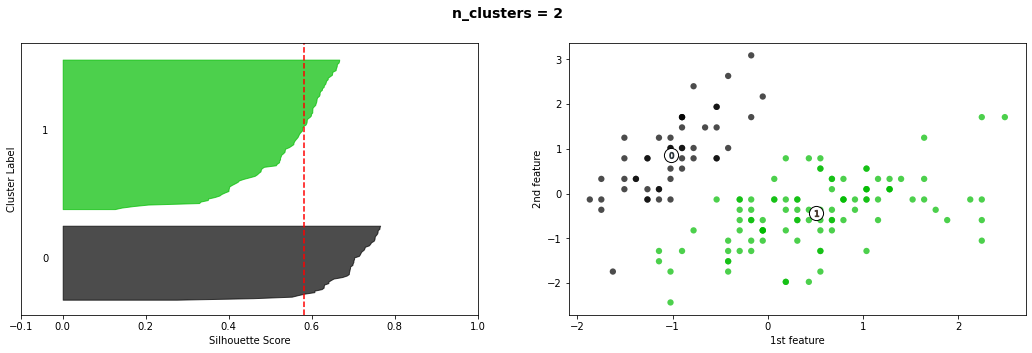

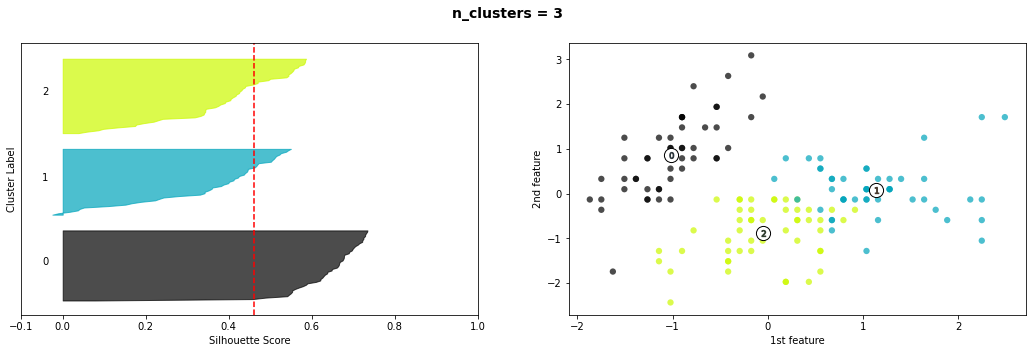

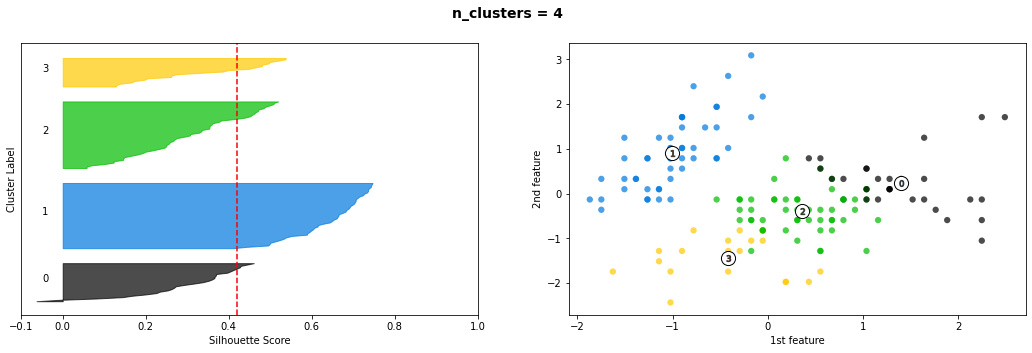

In [5]:
X = iris.data
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("Silhouette Score")
    ax1.set_ylabel("Cluster Label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='o', s=40, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=0.7, s=40, edgecolor='k')

    ax2.set_xlabel("1st feature")
    ax2.set_ylabel("2nd feature")

    plt.suptitle(("n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

plt.show()

_Kalp krizi riski'ne ilişkin veri kümesini kullanarak:_
- _Verileri rastgele ikiye bölün ve bu bölümdeki tutarlılık tartışmamızda yaptığımız gibi, küme sayısı olarak iki, üç ve dört kullanarak k-ortalama uygulayın. Görselleştirmeyi kullanarak çözümlerin tutarlılığını değerlendirin. Hangisi en iyisi gibi görünüyor?_
- _K veri setini tüm veri kümelerine k, iki, üç ve dört eşit olacak şekilde uygulayın, her biri için ARI puanı  ve siluet katsayısı elde edin. Hangi model en iyisidir?_

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_excel('heart.xlsx')
df['ca'] = df.ca.replace('<null>', 0)
df['thal'] = df.thal.replace('<null>', 3)
df['num'] = df.num.replace({'positive':1, "negative":0})
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
2,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [8]:
y = df.num
x = df.drop('num', axis=1)

scaler = StandardScaler()
x_std = scaler.fit_transform(x)

x_pca = PCA(n_components = 2).fit_transform(x_std)

In [9]:
x_std1, x_std2, x_pca1, x_pca2 = train_test_split(x_std, x_pca, test_size = 0.5, random_state = 42)
dfp_1, dfp_2 = pd.DataFrame(x_pca1), pd.DataFrame(x_pca2)

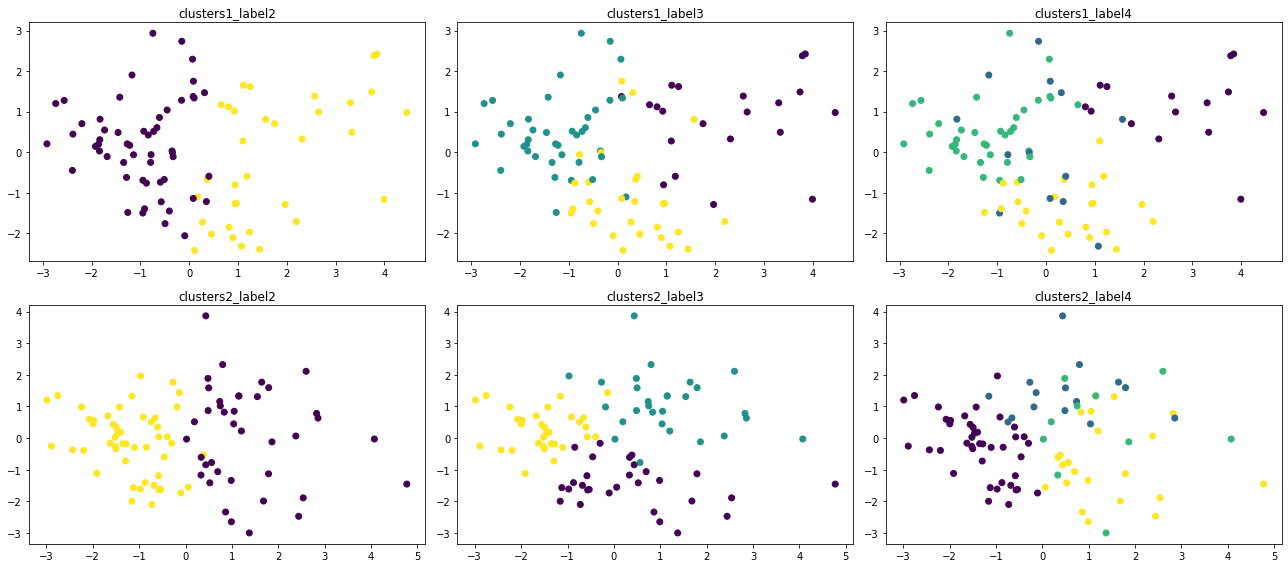

In [10]:
plt.figure(figsize=(18,8))
for num, k in enumerate(range(2,5),1):
    
    kmeans_1 = KMeans(n_clusters = k, random_state = 42) 
    kmeans_2 = KMeans(n_clusters = k, random_state = 42)
    dfp_1['pred_'+str(k)] = kmeans_1.fit_predict(x_std1)
    dfp_2['pred_'+str(k)] = kmeans_2.fit_predict(x_std2)
    
    plt.subplot(2, 3, num)
    plt.scatter(dfp_1[0], dfp_1[1], c = dfp_1['pred_'+str(k)], cmap = 'viridis')
    plt.title('clusters1_label'+str(k))
    
    plt.subplot(2, 3, num+3)
    plt.scatter(dfp_2[0], dfp_2[1], c = dfp_2['pred_'+str(k)], cmap = 'viridis')
    plt.title('clusters2_label'+str(k))
    
    plt.tight_layout()

For n_clusters = 2 The average silhouette_score is : 0.36677166811731315
For n_clusters = 3 The average silhouette_score is : 0.42728698878567867
For n_clusters = 4 The average silhouette_score is : 0.445284507193149


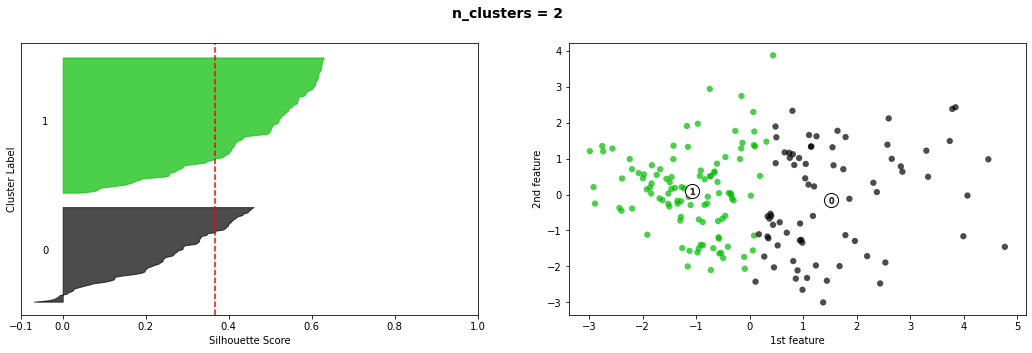

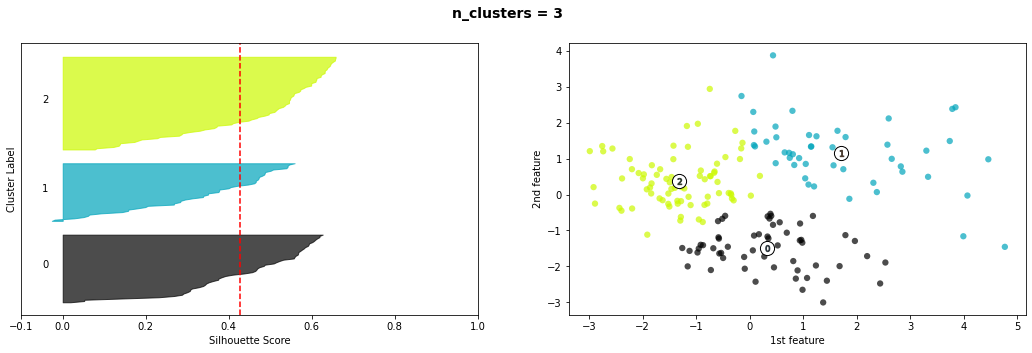

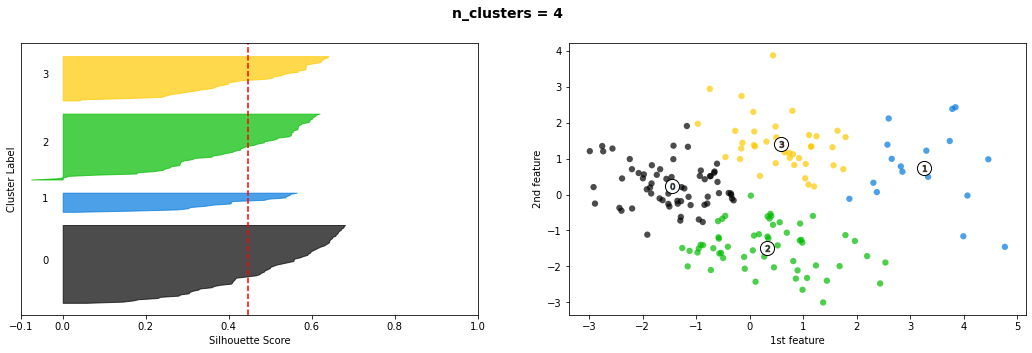

In [11]:
y = df.num
x = df.drop('num', axis=1)

scaler = StandardScaler()
x_std = scaler.fit_transform(x)

X = PCA(n_components = 2).fit_transform(x_std)

range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("Silhouette Score")
    ax1.set_ylabel("Cluster Label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='o', s=40, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=0.7, s=40, edgecolor='k')

    ax2.set_xlabel("1st feature")
    ax2.set_ylabel("2nd feature")

    plt.suptitle(("n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

plt.show()

In [12]:
x_pca = PCA(n_components = 2).fit_transform(x_std)
dfl = pd.DataFrame()
for k in range(2,6):
    y_pred = KMeans(n_clusters = k, random_state = 42).fit_predict(x_pca)
    dfl = dfl.append(pd.DataFrame({'ARI' : metrics.adjusted_rand_score(y, y_pred),
                                   'Silhouette Score': metrics.silhouette_score(x_pca, y_pred)}, index = ['label_'+str(k)]))
dfl

,ARI,Silhouette Score
label_2,0.067444,0.366772
label_3,0.053750,0.427287
label_4,0.083129,0.445285
label_5,0.057125,0.396199


> ARI değerleri, hedefin dengesiz dağılmasından kaynaklı çok düşük sonuçlandı, ama Silhouette değeri için 4 kümeleme en yüksek sonucu verdi.
Hedefin 2 olduğu düşünülürse, yeni kümelenmelerin ayrıca değerlendirilmesi gerekebilir.